In [2]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 42.7 MB/s eta 0:00:00


In [4]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.3 MB/s eta 0:00:00


In [15]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 83.5 MB/s eta 0:00:00


In [18]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.1 MB/s eta 0:00:00


# **Importing Libraries**

In [5]:
import fitz  # PyMuPDF
import pdfplumber
import os

# **Connecting with Gooogle Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
pdf_path = '/content/drive/MyDrive/company.pdf'

# **Finding Number of Pages in Pdf**

In [20]:
from pypdf import PdfReader
reader = PdfReader(pdf_path)
number_of_pages = len(reader.pages)
number_of_pages

2

# **Extracting Text from first Page**

In [23]:
page1 = reader.pages[0]
text1 = page1.extract_text()
print(text1)

A2Z EduScale Up 
We are a dedicated team of committed academics deployed in various colleges and institutes across 
India and abroad. Our team comprises Assistant Professors, Associate Professors, Professors, Heads of 
Departments, and Principals, who contribute their expertise as Question Paper-setters, Examiners, 
Curriculum Experts, and Textbook Writers. We firmly believe that a good teacher is one who not only 
has mastery of the subject matter but also strives to understand their students, encourages positive 
behavior, and cares deeply about learning through constructive feedback and actions. Our mission is to 
foster excellence in education through collaborative programs, professional development, and 
innovative teaching practices. 
 
We are dedicated to promoting academic excellence by providing specialized support for faculty 
members, research scholars, and students in their respective fields. Our comprehensive services are 
designed to enhance teaching, research, and learni

# **Extracting Table from 2nd Page**

In [24]:
page2 = reader.pages[1]
text2 = page2.extract_text()
print(text2)

Student Details 
 
Here are five names: Mike, Sara, Bob, John, Emma 
Here are six numbers: 100, 200, 4310, 233, 544, 122 
Here is a table full of data: 
Name of Students Age Job 
Mike 28 Programmer 
Olivia 38 Accountant 
Bob 68 Accountant 
Sophia 24 Lawyer 
Simon 25 Programmer 
 
 
 
 
 
 
 



In [16]:
import tabula
dfs = tabula.read_pdf(pdf_path, pages='2')

Jan 17, 2025 7:48:30 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jan 17, 2025 7:48:30 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jan 17, 2025 7:48:30 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 17, 2025 7:48:32 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [17]:
dfs

[  Name of Students  Age         Job
 0             Mike   28  Programmer
 1           Olivia   38  Accountant
 2              Bob   68  Accountant
 3           Sophia   24      Lawyer
 4            Simon   25  Programmer]

In [30]:
import pandas as pd

# Assuming dfs is the output from Tabula
# Check if dfs contains data
if dfs and isinstance(dfs, list):
    # Extract the first DataFrame
    df = dfs[0]

    # Rename columns (if needed)
    df.columns = ["Name of Students", "Age", "Job"]

    # Clean up the data by removing extra spaces, if necessary
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Display the cleaned DataFrame
    print("Cleaned Table:")
    print(df)
else:
    print("No table data found in dfs.")

Cleaned Table:
  Name of Students  Age         Job
0             Mike   28  Programmer
1           Olivia   38  Accountant
2              Bob   68  Accountant
3           Sophia   24      Lawyer
4            Simon   25  Programmer


<ipython-input-30-8f6284f9f006>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [31]:
df

,Name of Students,Age,Job
0,Mike,28,Programmer
1,Olivia,38,Accountant
2,Bob,68,Accountant
3,Sophia,24,Lawyer
4,Simon,25,Programmer


In [34]:
# Define the file path in Google Drive
output_file_path = '/content/drive/My Drive/Data Source/a.csv'

# Save the DataFrame as a CSV file
df.to_csv(output_file_path, index=False)

print(f"Table saved successfully to {output_file_path}")

Table saved successfully to /content/drive/My Drive/Data Source/a.csv


# **Extracting Image from 2nd Page**

In [35]:
import fitz
pdf_document = fitz.open(pdf_path)

# Select the second page (index 1 for 0-based indexing)
page_number = 1
page = pdf_document[page_number]

# Extract images from the page
image_list = page.get_images(full=True)

# Check if images are found
if not image_list:
    print("No images found on this page.")
else:
    for img_index, img in enumerate(image_list, start=1):
        xref = img[0]  # XREF of the image
        base_image = pdf_document.extract_image(xref)
        image_bytes = base_image["image"]  # The image data in bytes
        image_ext = base_image["ext"]  # The image file extension (e.g., 'png', 'jpeg')

        # Save the image
        image_filename = f"extracted_image_{img_index}.{image_ext}"
        with open(image_filename, "wb") as image_file:
            image_file.write(image_bytes)
        print(f"Image saved as {image_filename}")

Image saved as extracted_image_1.jpeg


In [36]:
import os

# Get the current working directory
cwd = os.getcwd()
print(f"The images are saved in the directory: {cwd}")

The images are saved in the directory: /content


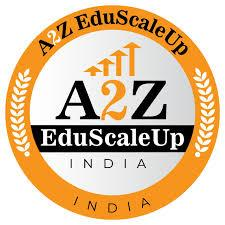

In [40]:
from IPython.display import Image

# Display the image
Image("/content/extracted_image_1.jpeg")